In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
data = pd.read_csv('movie_metadata.csv')

In [6]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [28]:
n_data = data.iloc[:,4:6]
n_data = n_data.dropna()
n_data

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
5,475.0,530.0
...,...,...
5037,0.0,133.0
5038,2.0,318.0
5040,0.0,0.0
5041,0.0,489.0


In [19]:
kmeans = KMeans(n_clusters=5)

In [20]:
kmeans.fit(n_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
kmeans.cluster_centers_   #it is like our 5 centroid for 5 cluster 
print(kmeans.labels_)
print(len(kmeans.labels_))
print(type(kmeans.labels_))

[0 0 0 ... 0 0 0]
4919
<class 'numpy.ndarray'>


In [70]:
# a = np.array([1, 2, 6, 4, 2, 3, 2, 6])
# u, indices = np.unique(a, return_inverse=True)
# u  ===> array([1, 2, 3, 4, 6])
# >>> indices
# array([0, 1, 4, 3,1, 2, 1, 4])
# >>> u[indices]
# array([1, 2, 6, 4, 2, 3, 2, 6])

In [77]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

#it is our data distributed into 5 cluster according to centroid

print(dict(zip(unique,counts)))  

{0: 4651, 1: 104, 2: 87, 3: 11, 4: 66}


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


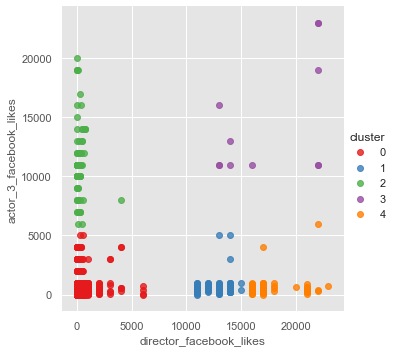

In [94]:
n_data['cluster'] = kmeans.labels_

sns.set(style="whitegrid", color_codes=True)
plt.style.use('ggplot')
sns.lmplot('director_facebook_likes', 'actor_3_facebook_likes', data=n_data, hue='cluster',
            palette='Set1',size=5, aspect=1, fit_reg=False)

In [93]:
# sns.pairplot(n_data, x_vars=['director_facebook_likes'], y_vars=['actor_3_facebook_likes'], hue='cluster', size=5, palette='Set1')